# CNN Basic
> In this post, We will dig into the basic operation of Convolutional Neural Network, and explain about what each layer look like. And we will simply implement the basic CNN archiecture with tensorflow.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Deep_Learning, Tensorflow-Keras]
- image: images/cnn_stacked.png

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (16, 10)
plt.rc('font', size=15)

## Convolutional Neural Network
 [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN for short) is the most widely used for image classification. Previously, we handled image classification problem (Fashion-MNIST) with Multi Layer Perceptron, and we found that works. At that time, the information containing each image is very simple, and definitely classified with several parameters. But if the dataset contains high resolution image and several channels, it may require huge amount of parameters with mlp in image classification. How can we effectively classify the image without huge amount of parameters? And that's why the CNN exists.
 
![CNN example](image/cnn_example.png)
*Fig 1. Example of Convolutional Neural Network*
 
 Generally, it consists of **Convolution layer**, **Pooling layer**, and **Fully-connected layer**. Usually, Convolution layer and Pooling layer is used for feature extraction. Feature extraction means that it extract important features from image for classification, so that all pixels in images is not required. Through these layer, information of data is resampled, and refined, and go to the output node. Fully-connected (also known as FC) is used for classification.

### 2D Convolution Layer
To understand convolution layer, we need to see the shape of image and some elements to extract features called filters(also called kernel).

![convolution layer](image/conv_layer.png)

In Fashion-MNIST example, the image containing dataset is grayscale. So the range of pixel value is from 0 to 255. But most of real-world image and all the things we see now is colorized. Technically, it can expressed with 3 base color, Red, Green, Blue. The color system which can express these 3 colors are called **RGB**, and each range of pixel value is also from 0 to 255, same as grayscaled pixel.

> Note: There are other color systems like RGBA (Red-Green-Blue-Alpha) or HSV (Hue-Saturation-Value), HSL (Hue-Saturation-Lightness), etc. In this post, we just assume that image has 3 channels (RGB)

So In the figure, this image has shape of 32x32 and 3 channels (RGB).

And Next one is the filter, which shape has 5x5x3. The number we need to focus on **3**. Filter always extend the full channel of the input volume. So it requires to set same number of channels in input nodes and filters. 

As you can see, filter has same channel with input image. And let's assume the notation of filter, $w$. Next thing we need to do is just slide th filter over the image spatially, and compute dot products, same as MLP operation (This operation is called **convolution**, and it's the reason why this layer is called Convolution layer). Simply speaking, we just focus on the range covered in filter and dot product like this,

$$ w^T x + b $$

Of course, we move the filter until it can operate convolution.

![animation](image/convolutions.gif)
*Fig 3. Animation of convolution operation

After that, (Assume we don't apply padding, and stride is 1), we can get output volume which shape has 28x28x1. There is formula to calculate the shape of output volume when the stride and filter is defined,

$$ \frac{(\text{Height of input} - \text{Height of filter})}{\text{Stride}} + 1 $$

We can substitute the number in this formula, then we can conclude the height of output volume is 28. The output the process convolution is called **Feature Map** (or Activation Map). One feature map gather from one filter, we can apply several filters in one input image. If we use 6 5x5 filters, we can get 6 separate feature maps. We can stack them into one object, then we get "new image" of size 28x28x6.

![cnn stacked](image/cnn_stacked.png)
<p>
    <em>Fig 4. stacked output of convolution</em>
</p>

Here, one number is need to focus, **6**. 6 means the number of filters we apply in this convolution layer.

You may be curious about what filter looks like. Actually, filter was widely used from classic computer vision. For example, to extract the edge of object in image, we can apply the *canny edge filer*, and there is edge detection filter named *sobel filter*, and so on. We can bring the concept of filter in CNN here. In short, filter extract the feature like where the edge is, and convolution layer refine its feature.

![operation](image/convolution_op2.png)
*Fig 5. Applying filter for each pixel*

Here, we just consider the one channel of image and apply it with 6 filters. And we can extend it in multi-channel, and lots of filters.

![manychannel](image/convolution_manychannel.png)
*Fig 6. Convolution operation in many channels and many filters*

### Options of Convolution

So what parameteter may affect operation in convolution layer? We can introduce three main parameters for convolution layer: stride, zero-padding, and activation function.

**Stride** is the size of step that how far to go to the right or the bottom to perform the next convolution.  It is important that it defines the output model's size. Review the formula of calculating the feature map size,

$$ \frac{(\text{Height of input} - \text{Height of filter})}{\text{Stride}} + 1 $$

We can define any size of strides unless its value is smaller than original model size. As we increase the stride, then the size of feature map will be small, and it means that feature will also be small. Think about that the picture is summarized by just a small dot.

**Zero-padding** is another factor that affect the convolution layer. The meaning is contained in its name. A few numbers of zeros surrounds the original image, then process the convolution operation. As we can see from previous process, if the layer is deeper and deeper, then the information will be smaller the original one due to the convolution operation. To preserve the size of original image during process, zero-padding is required. If the filter size is FxF and stride is 1, then we can also calculate the zero-padding size,

$$ \frac{F - 1}{2} $$

You may see the **Activation Function** in MLP. It can also apply in the Convolution layer.
For example, when we apply Rectified Linear Unit (ReLU) in feature map, we can remove the value that lower than 0,

### Convolution Layer in Tensorflow
Let's look at how we can use Convolution layer in tensorflow. Actually, in Tensorflow v2.x, Convolution layer is implemented in keras as an high-level class, so all we need to do is just defineing the parameters correctly. Here is the `__init__` of `tf.keras.layers.Conv2D`.

```python
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)
```

We already covered filters, kernel_size (same as filter_size), strides, and so on. Here is brief description of arguments:

| arguments |  |
| --- | --- |
| filters | Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution). |
| kernel_size | An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions. |
| strides | An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1. |
| padding | one of "valid" or "same" (case-insensitive). |
| data_format | A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels,height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be channels_last. |
| activation | Activation function to use. If you don't specify anything, no activation is applied (see [keras.activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)). |
| use_bias | Boolean, whether the layer uses a bias vector. |
| kernel_initializer | Initializer for the kernel weights matrix |
| bias_initializer | Initializer for the bias vector |

We need to focus on the `data_format`. The description said that the default value of data_format is 'channels_last'. It means that all data in this layer must follow in this format order: `(batch, height, width, channels)`

And `padding` argument can accept `valid` and `same`. `same` means no zero-padding. In this case, it drops the last convolution if the dimensions do not match (or fraction). If you want to use zero-padding, then we need to define `padding` argument as `same`. In this case, it pads such that feature map size has same as original one.(That's why we call the `same`) Usually it is also called 'half' padding.

### Example with Toy Image
Let's use the convolution layer. For the simplicity, we will use a simple toy image, then see the output.

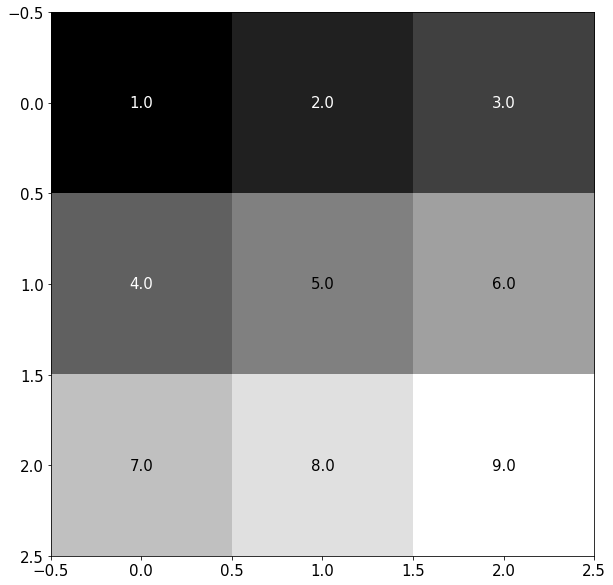

In [2]:
image = tf.constant([[[[1], [2], [3]], 
                     [[4], [5], [6]],
                     [[7], [8], [9]]]], dtype=np.float32)
fig, ax = plt.subplots()
ax.imshow(image.numpy().reshape(3, 3), cmap='gray')

for (j, i), label in np.ndenumerate(image.numpy().reshape(3, 3)):
    if label < image.numpy().mean():
        ax.text(i, j, label, ha='center', va='center', color='white')
    else:
        ax.text(i, j, label, ha='center', va='center', color='k')
plt.show()

In [3]:
print(image.shape)

(1, 3, 3, 1)


We made a simple image that has size of 3x3. Rememeber that the order of data should be `(batch, height, width, channel)`. In this case, batch size is 1, and currently generates the grayscaled image, so the channel should be 1.

Then, we need to define filter and kernel_size, and padding method. We will use one filter with all-one weight that has 2x2 shape.

Note that we need to set the same format in image shape and filter. If not, following error will be occurred,

```python
ValueError: setting an array element with a sequence.
```

In [4]:
# Weight Initialization
weight = np.array([[[[1.]], [[1.]]],
                   [[[1.]], [[1.]]]])
weight_init = tf.constant_initializer(weight)
print("weight.shape: {}".format(weight.shape))

# Convolution layer
layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), padding='VALID', kernel_initializer=weight_init)
output = layer(image)

weight.shape: (2, 2, 1, 1)


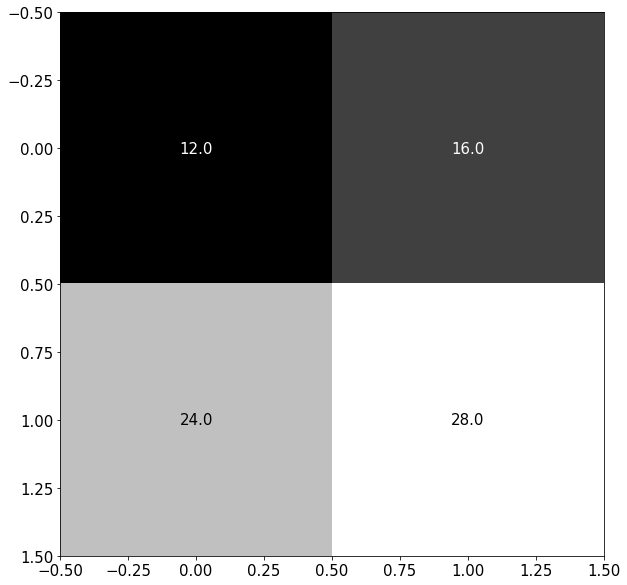

In [5]:
# Check the result
fig, ax = plt.subplots()
ax.imshow(output.numpy().reshape(2, 2), cmap='gray')
for (j, i), label in np.ndenumerate(output.numpy().reshape(2, 2)):
    if label < output.numpy().mean():
        ax.text(i, j, label, ha='center', va='center', color='white')
    else:
        ax.text(i, j, label, ha='center', va='center', color='k')

plt.show()

See? This is the output of convolution layer with toy image. In this time, change the padding argument from `VALID` to `SAME` and see the result. In this case, zero padding is added ('half' padding), so the output shape will be also changed.

In [6]:
# Convolution layer with half padding
layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(2, 2), padding='SAME', kernel_initializer=weight_init)
output2 = layer(image)

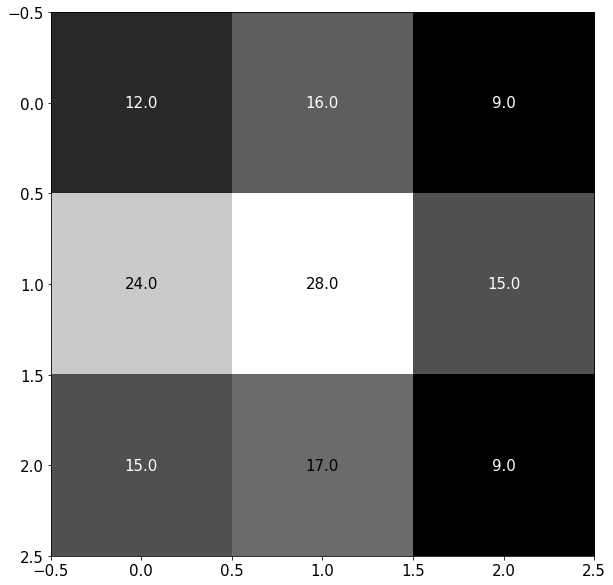

In [7]:
# Check the result
fig, ax = plt.subplots()
ax.imshow(output2.numpy().reshape(3, 3), cmap='gray')
for (j, i), label in np.ndenumerate(output2.numpy().reshape(3, 3)):
    if label < output2.numpy().mean():
        ax.text(i, j, label, ha='center', va='center', color='white')
    else:
        ax.text(i, j, label, ha='center', va='center', color='k')
plt.show()

And what if we apply 3 filters in here?

Weight shape: (2, 2, 1, 3)


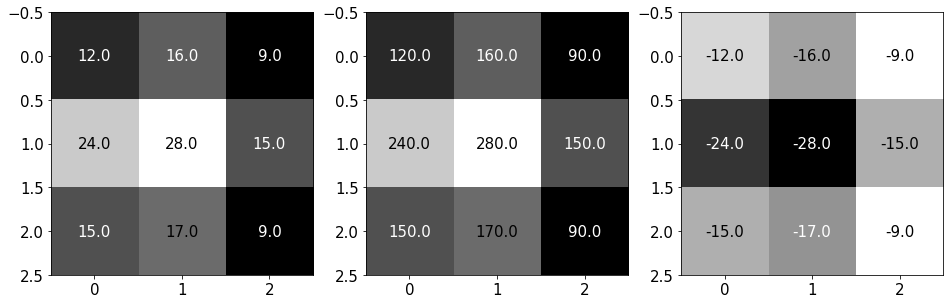

In [8]:
# Weight initialization
weight = np.array([[[[1., 10., -1.]], [[1., 10., -1.]]],
                   [[[1., 10., -1.]], [[1., 10., -1.]]]])
weight_init = tf.constant_initializer(weight)
print("Weight shape: {}".format(weight.shape))

# Convolution layer
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(2, 2), padding='SAME', kernel_initializer=weight_init)
output = layer(image)

## Check output
feature_maps = np.swapaxes(output, 0, 3)

fig, ax = plt.subplots(1, 3)
for x, feature_map in enumerate(feature_maps):
    ax[x].imshow(feature_map.reshape(3, 3), cmap='gray')
    for (j, i), label in np.ndenumerate(feature_map.reshape(3, 3)):
        if label < feature_map.mean():
            ax[x].text(i, j, label, ha='center', va='center', color='white')
        else:
            ax[x].text(i, j, label, ha='center', va='center', color='k')

### Pooling Layer
After passing Activation function, the output may be changed. We can summarize the output with some rules, for example, find the maximum pixel value in specific filter that assume to represent that field.

![max_pool](image/maxpool.png)
*Fig 7, Max-Pooling*

In the figure, we use 2x2 filter for pixel handling. When the filter is slided by stride 2, filter find the maximum pixel value, and re-define it as an output.

Or we can find the average pixel value in specific filter that assume to represent that field. Prior one is called **Max-Pooling**, and latter is called **Average-Pooling**. Usually, this kind of process is called **Sub-sampling**, since this process extract the important pixel(Max or Average) from the image, and the output size is reduced by half.

#### Max Pooling Layer in Tensorflow
Same as Convolution Layer, Max Pooling Layer is also defined in Tensorflow-keras as a high level class. Here is the `__init__` of `tf.keras.layers.MaxPool2D`. (you can also check [AveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) in documentation)

```python
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs
)
```

Actually, it is almost same as that of convolution layer. `pool_size` argument is similar with `filter_size` in convolution layer, and it will define the range to extract the maximum value. Here is brief description of arguments:

| arguments |  |
| --- | --- |
| pool_size | integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension. If only one integer is specified, the same window length will be used for both dimensions.
 |
| strides | Integer, tuple of 2 integers, or None. Strides values. If None, it will default to pool_size.
 |
| padding | One of "valid" or "same" (case-insensitive). |
| data_format | A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels,height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be channels_last. |

### Example with Toy Image
Here, we will check the Maxpooling operation with toy image.

In [11]:
# Sample image
image = tf.constant([[[[4.], [3.]],
                     [[2.], [1.]]]], dtype=np.float32)

In [12]:
# Max Pooling layer
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='VALID')
output = layer(image)

# Check the output
print(output.numpy())

[[[[4.]]]]


After that, we found out that the output of this image is just 4, the maximum value. How about the case with `SAME` padding?

In [13]:
layer = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1, padding='SAME')
output = layer(image)

print(output.numpy())

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


You may see that the output is different compared with previous one. That's because, while max pooling operation is held, zero-padding is also considered as an one pixel. So the 4 max-pooling operation is occurred.

![SAME padding](image/maxpooling_same_padding.png)

## Convolution/MaxPooling in MNIST
In this case, we apply the convolution/MaxPooling operation in more specific dataset, the MNIST dataset. First, load the data. and normalize it. And see the sampled data.

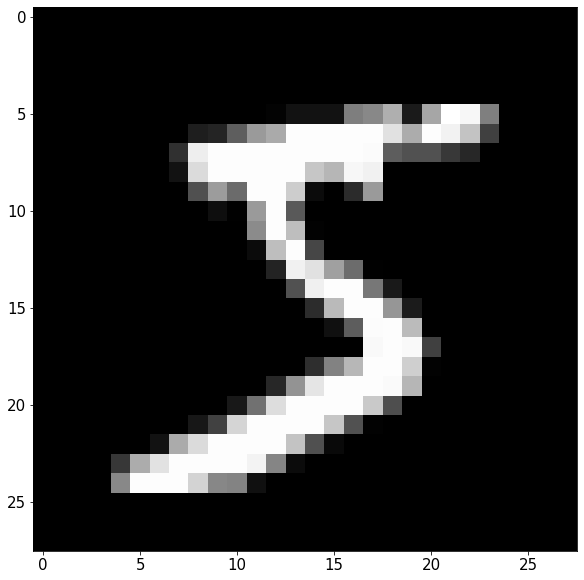

In [23]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalization
X_train = X_train.astype(np.float32) / 255.
X_test = X_test.astype(np.float32) / 255.

image = X_train[0]
plt.imshow(image, cmap='gray')
plt.show()

To handle this image in tensorflow, we need to convert it from 2d numpy array to 4D Tensor. There are several approaches to convert 4D tensor. One of approaches in Tensorflow is add `tf.newaxis` like this,

In [24]:
print("Dimension: {}".format(image.shape))
image = image[tf.newaxis, ..., tf.newaxis]
print("Dimension: {}".format(image.shape))

# Convert it to tensor
image = tf.convert_to_tensor(image)

Dimension: (28, 28)
Dimension: (1, 28, 28, 1)


Same as before, we initialize the filter weight and apply it to convolution layer. In this case, we use 5 filters and (3, 3) filter size and stride to (2, 2), and padding is `SAME`.

In [29]:
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)
layer_conv = tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), strides=(2, 2), padding='SAME',
                               kernel_initializer=weight_init)
output = layer_conv(image)
print(output.shape)

(1, 14, 14, 5)


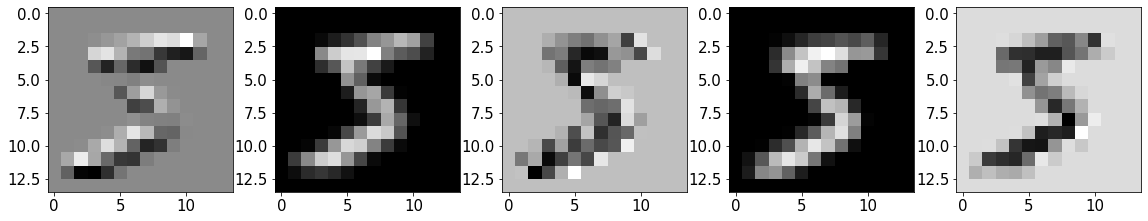

In [30]:
feature_maps = np.swapaxes(output, 0, 3)

fig, ax = plt.subplots(1, 5)
for i, feature_map in enumerate(feature_maps):
    ax[i].imshow(feature_map.reshape(14, 14), cmap='gray')
plt.tight_layout()
plt.show()

After that, we use this output to push max-pooling layer as an input.

In [31]:
layer_pool = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')
output2 = layer_pool(output)
print(output2.shape)

(1, 7, 7, 5)


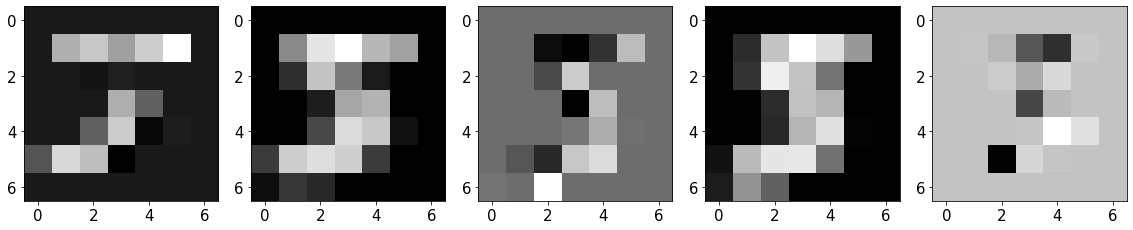

In [33]:
feature_maps = np.swapaxes(output2, 0, 3)

fig, ax = plt.subplots(1, 5)
for i, feature_map in enumerate(feature_maps):
    ax[i].imshow(feature_map.reshape(7, 7), cmap='gray')
plt.tight_layout()
plt.show()

Using this, we extract the feature of input. Then we can use Fully-Connected Layer with softmax activation function for classification. (Actually, We already covered Fully-Connected layer with softmax activation function in previous post).

## Summary
In this post, We covered the definition of Convolutional Neural Network, and its basic opeartions, convolution and max-pooling. Unlike Artificial Neural Network, The purpose of these operation is actually to extract the feature and handle it efficiently without whole informations. We can use it in various ways, and of course, we can re-do the image classification with CNN, same as MLP.